In [54]:
import random
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [10]:
spotify_data = pd.read_csv("/Users/anshikagupta/Downloads/spotify52kData.csv")
rating_data = pd.read_csv("/Users/anshikagupta/Downloads/starRatings.csv", header=None)

In [11]:
spotify_data

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.92400,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.90500,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,51995,Don Omar;Trebol Clan,Perreo Tenebroso Vol. 3,Tu Cuerpo Me Arrebata,0,203653,False,0.819,0.6450,10,-6.707,0,0.0481,0.23200,0.000863,0.1780,0.724,94.998,4,hip-hop
51996,51996,Don Omar,Feliz Cumpleaños con Perreo,Dale Don Dale,1,212413,False,0.831,0.8180,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51997,51997,Don Omar,Última Misión Reggaeton,Dale Don Dale,0,212413,False,0.831,0.8180,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51998,51998,Moneybagg Yo;Pooh Shiesty;Lil Durk;EST Gee,Energy Hip Hop,Switches & Dracs,0,168620,True,0.727,0.6470,11,-7.383,0,0.2800,0.03290,0.000000,0.2460,0.529,159.959,4,hip-hop


In [12]:
np.random.seed(17951972)
random.seed(17951972)

### Question 1 

Is there a relationship between song length and popularity of a song? If so, is it positive or negative?

<Axes: >

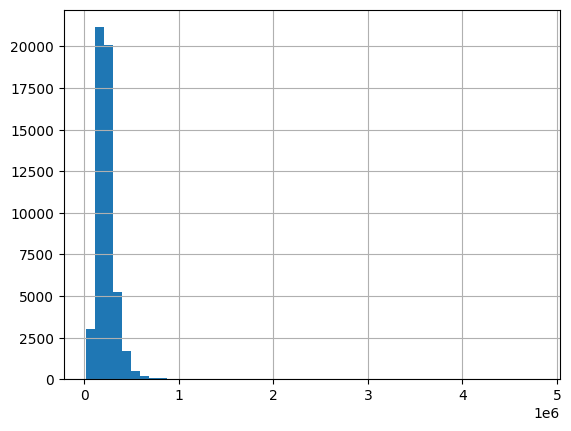

In [13]:
spotify_data['duration'].hist(bins=50)

In [14]:
spotify_data['duration_'] = spotify_data['duration'] / 60000

<Axes: >

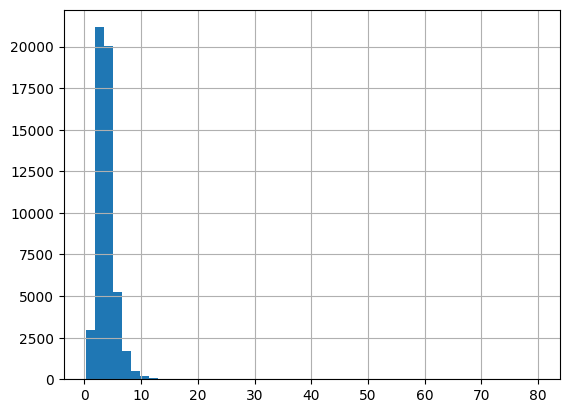

In [15]:
spotify_data['duration_'].hist(bins=50)

<Axes: >

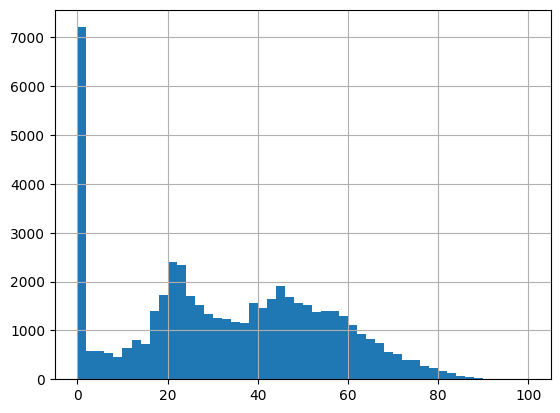

In [16]:
spotify_data['popularity'].hist(bins=50)

In [17]:
corr = spotify_data[['duration_', 'popularity']].corr()
print(corr)

            duration_  popularity
duration_    1.000000   -0.054651
popularity  -0.054651    1.000000


### Question 2

Are explicitly rated songs more popular than songs that are not explicit?

In [18]:
q2_data = spotify_data.groupby('explicit')['popularity'].mean()
q2_data

explicit
False    32.790595
True     35.813114
Name: popularity, dtype: float64

In [19]:
explicit_popularity = spotify_data[spotify_data['explicit'] == True]['popularity']
non_explicit_popularity = spotify_data[spotify_data['explicit'] == False]['popularity']

explicit_popularity = explicit_popularity.dropna()
non_explicit_popularity = non_explicit_popularity.dropna()

In [20]:
u,p = mannwhitneyu(explicit_popularity, non_explicit_popularity, alternative="greater")
print("P-value:", p)
print(u)

P-value: 1.5339599669557339e-19
139361273.5


### Question 3

Are songs in major key more popular than songs in minor key?

In [21]:
spotify_data['key'].min()

0

### Question 4

Which of the following 10 song features: duration, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence and tempo predicts popularity best? How good is this model?

In [23]:
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
target = 'popularity'

y = spotify_data[target]

coef_arr = []
rmse_arr=[]
rsq_arr =[]

for f in features:
    print(f)
    X = spotify_data[[f]]
    model = LinearRegression()
    model.fit(X, y)

    coeffs = model.coef_
    pred = model.predict(X)

    RMSE = mean_squared_error(y, pred)
    r2 = r2_score(y, pred)
    
    coef_arr.append(model.coef_)
    rmse_arr.append(RMSE)
    rsq_arr.append(r2)

    print("Coefficients:", model.coef_)
    print("Mean Squared Error:", RMSE)
    print("R-squared:", r2)
    print()


duration
Coefficients: [-1.00976878e-05]
Mean Squared Error: 471.36717918954116
R-squared: 0.00298675321727615

danceability
Coefficients: [4.57572437]
Mean Squared Error: 472.12648643945244
R-squared: 0.0013807029448721364

energy
Coefficients: [-4.87212671]
Mean Squared Error: 471.3006034509592
R-squared: 0.0031275710260059153

loudness
Coefficients: [0.26614248]
Mean Squared Error: 471.0653119641463
R-squared: 0.0036252482924015172

speechiness
Coefficients: [-8.02489459]
Mean Squared Error: 471.6656600849221
R-squared: 0.0023554207449602016

acousticness
Coefficients: [1.76969242]
Mean Squared Error: 472.45389179487603
R-squared: 0.0006881908421283445

instrumentalness
Coefficients: [-9.69098786]
Mean Squared Error: 462.8428718411944
R-squared: 0.021016959224749554

liveness
Coefficients: [-5.07153011]
Mean Squared Error: 471.87034816389007
R-squared: 0.001922474338847513

valence
Coefficients: [-3.04623249]
Mean Squared Error: 472.17437740401937
R-squared: 0.0012794062738639145

t

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'duration'),
  Text(1, 0, 'danceability'),
  Text(2, 0, 'energy'),
  Text(3, 0, 'loudness'),
  Text(4, 0, 'speechiness'),
  Text(5, 0, 'acousticness'),
  Text(6, 0, 'instrumentalness'),
  Text(7, 0, 'liveness'),
  Text(8, 0, 'valence'),
  Text(9, 0, 'tempo')])

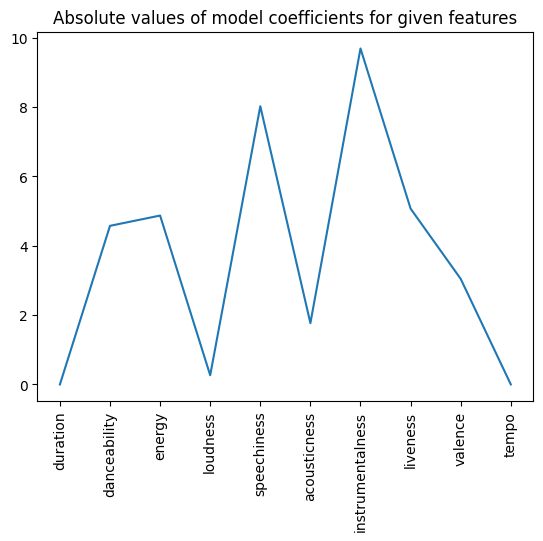

In [44]:
plt.plot(features,np.absolute(coef_arr))
plt.title("Absolute values of model coefficients for given features")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'duration'),
  Text(1, 0, 'danceability'),
  Text(2, 0, 'energy'),
  Text(3, 0, 'loudness'),
  Text(4, 0, 'speechiness'),
  Text(5, 0, 'acousticness'),
  Text(6, 0, 'instrumentalness'),
  Text(7, 0, 'liveness'),
  Text(8, 0, 'valence'),
  Text(9, 0, 'tempo')])

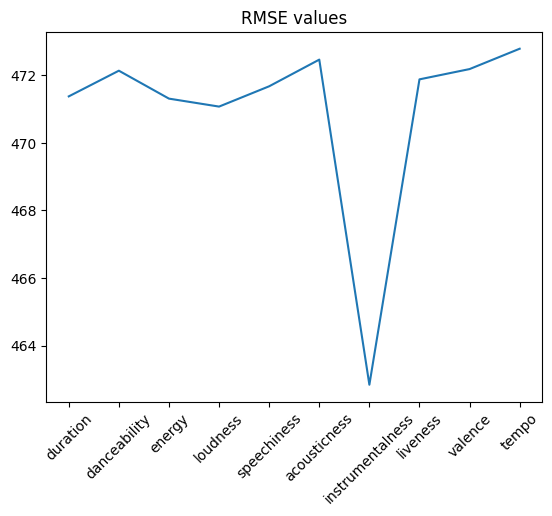

In [45]:
plt.plot(features,rmse_arr)
plt.title("RMSE values")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'duration'),
  Text(1, 0, 'danceability'),
  Text(2, 0, 'energy'),
  Text(3, 0, 'loudness'),
  Text(4, 0, 'speechiness'),
  Text(5, 0, 'acousticness'),
  Text(6, 0, 'instrumentalness'),
  Text(7, 0, 'liveness'),
  Text(8, 0, 'valence'),
  Text(9, 0, 'tempo')])

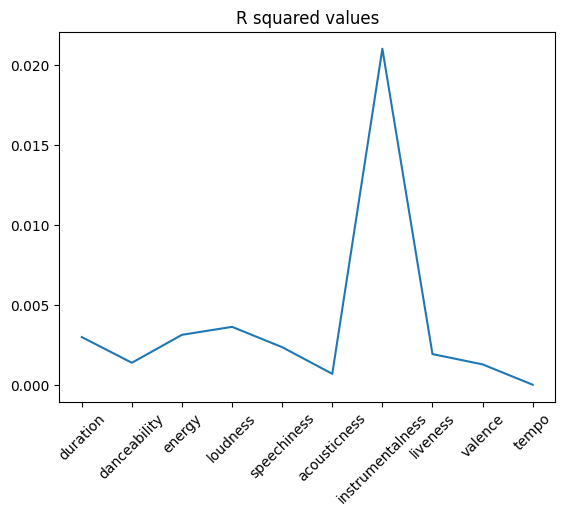

In [46]:
plt.plot(features,rsq_arr)
plt.title("R squared values")
plt.xticks(rotation=45)

### Question 5

Building a model that uses *all* of the song features mentioned in question 1, how well can you
predict popularity? How much (if at all) is this model improved compared to the model in question
4). How do you account for this? What happens if you regularize your model?

In [47]:
X = spotify_data[features]
model = LinearRegression()
model.fit(X, y)
coeffs = model.coef_
pred = model.predict(X)

RMSE = mean_squared_error(y, pred)
r2 = r2_score(y, pred)

print("Coefficients:", model.coef_)
print("Mean Squared Error:", RMSE)
print("R-squared:", r2)
print()

Coefficients: [-8.12966659e-06  5.05399676e+00 -1.38413219e+01  6.62993824e-01
 -7.38828256e+00  9.78514738e-01 -8.77191669e+00 -2.34193433e+00
 -8.10241388e+00  8.40718143e-03]
Mean Squared Error: 450.23732166739654
R-squared: 0.047679614286711525



In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

coeffs = model.coef_
pred = model.predict(X_test)
RMSE = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print("Coefficients:", model.coef_)
print("Mean Squared Error:", RMSE)
print("R-squared:", r2)
print()

Coefficients: [-7.68811748e-06  4.43129152e+00 -1.36248018e+01  6.59684183e-01
 -7.32693909e+00  9.40826443e-01 -8.72673637e+00 -2.64530402e+00
 -7.67466642e+00  8.12359165e-03]
Mean Squared Error: 445.68902465840165
R-squared: 0.0523541198267119



#### Ridge Rigression

In [49]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
ridge = Ridge()
alpha_range = np.linspace(0.0001, 120, 400)
params = {'alpha': alpha_range}  # Adjust these values based on your data
#cross validating
ridge_cv = GridSearchCV(ridge, params, cv=5)
ridge_cv.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = ridge_cv.best_params_['alpha']

# Train the model with the best hyperparameters
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)

# Make predictions
predictions = ridge_model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
cod = ridge_model.score(X_test, y_test)
print(rmse)
print(cod)


21.11171092235081
0.05232155970166208


#### Lasso Rigression

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
lasso = Lasso()
alpha_range = np.linspace(0.0001, 120, 400)
params = {'alpha': alpha_range}  # Adjust these values based on your data
#cross validating
lasso_cv = GridSearchCV(lasso, params, cv=5)
lasso_cv.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = lasso_cv.best_params_['alpha']

# Train the model with the best hyperparameters
lasso_model = Ridge(alpha=best_alpha)
lasso_model.fit(X_train, y_train)

# Make predictions
predictions = lasso_model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
cod = lasso_model.score(X_test, y_test)
print(rmse)
print(cod)


21.11134824865985
0.052354119363632545


When comparing these metrics to the ones from the Lasso and Ridge regression models, it seems that all models are struggling to capture the underlying pattern in the data, as indicated by the low R² values across all models. The MSE for the non-regularized model is significantly higher than the RMSE of the Lasso and Ridge models, suggesting more pronounced errors in prediction.

These observations might suggest that:

The linear model, regardless of regularization, may not be suitable for your data. It could be that the relationship between the variables is not linear or there are interactions or non-linear patterns that the model is not capturing.
Essential predictors or important variable interactions might be missing from the model.
The data might be inherently noisy, or there could be issues with data quality.
It may be beneficial to explore other types of models, especially ones that can capture non-linear relationships, such as decision trees, random forests, or neural networks, depending on the nature and amount of your data.

### Question 6

When considering the 10 song features in the previous question, how many meaningful principal components can you extract? What proportion of the variance do these principal components account for? Using these principal components, how many clusters can you identify? Do these clusters reasonably correspond to the genre labels in column 20 of the data? 

In [51]:
X_stan = StandardScaler().fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_stan)
variance = pca.explained_variance_ratio_.cumsum()
n_components = sum(variance <= 0.95) + 1

In [52]:
n_components

8

/Users/anshikagupta/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anshikagupta/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anshikagupta/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anshikagupta/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

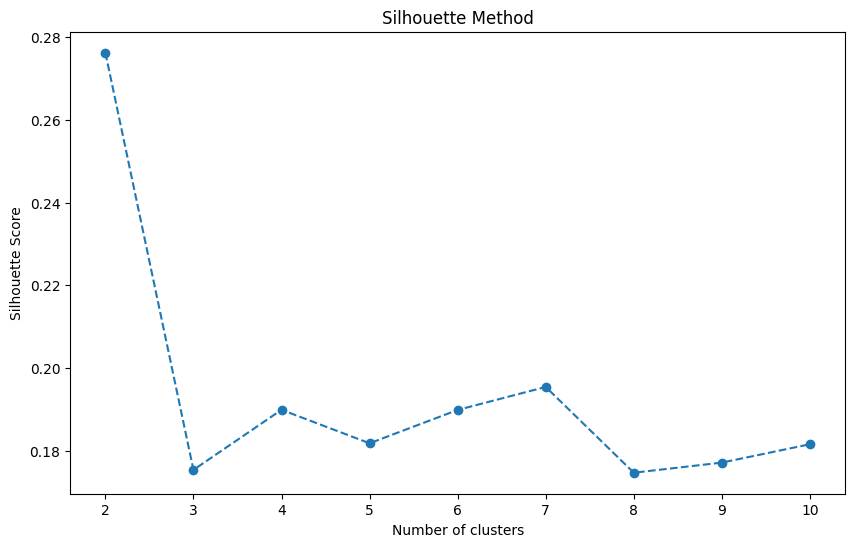

In [55]:
silhouette_scores = []
for i in range(2, 11):  # Starting from 2 as silhouette score isn't defined for 1 cluster
    kmeans = KMeans(n_clusters=i, random_state=42)
    clusters = kmeans.fit_predict(X_pca[:, :n_components])
    score = silhouette_score(X_pca[:, :n_components], clusters)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [56]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca[:, :n_components])

/Users/anshikagupta/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [57]:
clusters

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [58]:
spotify_data['cluster'] = clusters
# Assuming column 20 is named 'genre'
genre_cluster_distribution = spotify_data.groupby(['cluster', 'track_genre']).size().unstack(fill_value=0)


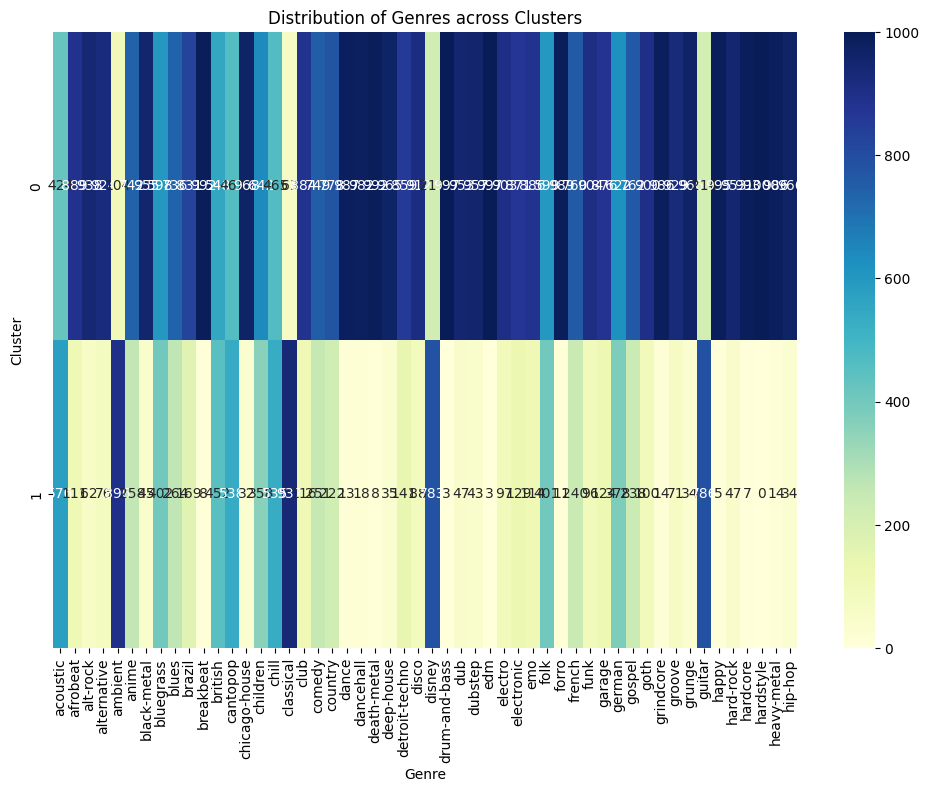

In [59]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(genre_cluster_distribution, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Distribution of Genres across Clusters')
plt.ylabel('Cluster')
plt.xlabel('Genre')
plt.show()

In [ ]:
pd.crosstab(spotify_data['cluster'], spotify_data['track_genre'])

In [ ]:

from sklearn.metrics import normalized_mutual_info_score
normalized_mutual_info_score(spotify_data['track_genre'],spotify_data['cluster'])


In [ ]:
features

In [5]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

# Assuming 'df' is your DataFrame and it includes the song features and genre labels
# features = df.iloc[:, :10]  # Selecting the first 10 columns as features
# genres = df.iloc[:, 19]  # Assuming the 20th column (index 19) is the genre label

# Preprocessing
# Standardizing features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(spotify_data[features])

# Encoding genres
encoder = OneHotEncoder(sparse=False)
genres_encoded = encoder.fit_transform(spotify_data['track_genre'].values.reshape(-1, 1))

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(features_scaled, genres_encoded, test_size=0.2, random_state=42)

# Neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

# Predict and report
predictions = model.predict(X_test)
predicted_genres = encoder.inverse_transform(predictions)
true_genres = encoder.inverse_transform(y_test)
print(classification_report(true_genres, predicted_genres, target_names=encoder.categories_[0]))


Train on 37440 samples, validate on 4160 samples
Epoch 1/50
37440/37440 [==============================] - 59s 2ms/sample - loss: 3.5376 - accuracy: 0.0959 - val_loss: 3.0540 - val_accuracy: 0.1827
Epoch 2/50
37440/37440 [==============================] - 1s 34us/sample - loss: 3.1887 - accuracy: 0.1486 - val_loss: 2.9297 - val_accuracy: 0.2048
Epoch 3/50
37440/37440 [==============================] - 1s 35us/sample - loss: 3.1136 - accuracy: 0.1661 - val_loss: 2.8987 - val_accuracy: 0.2132
Epoch 4/50
37440/37440 [==============================] - 1s 34us/sample - loss: 3.0772 - accuracy: 0.1754 - val_loss: 2.8629 - val_accuracy: 0.2139
Epoch 5/50
37440/37440 [==============================] - 2s 46us/sample - loss: 3.0477 - accuracy: 0.1822 - val_loss: 2.8537 - val_accuracy: 0.2154
Epoch 6/50
37440/37440 [==============================] - 1s 37us/sample - loss: 3.0324 - accuracy: 0.1838 - val_loss: 2.8416 - val_accuracy: 0.2180
Epoch 7/50
37440/37440 [==============================] -

C:\Users\Mudassir\anaconda3\envs\p37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mudassir\anaconda3\envs\p37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mudassir\anaconda3\envs\p37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report



scaler = StandardScaler()
features_scaled = scaler.fit_transform(spotify_data[features])
pca = PCA(n_components=0.95)  # Adjust this to capture the desired amount of variance
principal_components = pca.fit_transform(features_scaled)

encoder = OneHotEncoder(sparse=False)
genres_encoded = encoder.fit_transform(spotify_data['track_genre'].values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(principal_components, genres_encoded, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(genres_encoded.shape[1], activation='softmax')  # The output layer size should match the number of genres
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')
predictions = model.predict(X_test)
predicted_genre_indices = np.argmax(predictions, axis=1)
true_genre_indices = np.argmax(y_test, axis=1)


predicted_genres = encoder.inverse_transform(predicted_genre_indices.reshape(-1, 1))
true_genres = encoder.inverse_transform(true_genre_indices.reshape(-1, 1))


print(classification_report(true_genres, predicted_genres))


Train on 41600 samples, validate on 10400 samples
Epoch 1/100
41600/41600 [==============================] - 5s 122us/sample - loss: 3.4054 - accuracy: 0.1179 - val_loss: 2.9849 - val_accuracy: 0.2032
Epoch 2/100
41600/41600 [==============================] - 5s 120us/sample - loss: 3.1183 - accuracy: 0.1658 - val_loss: 2.9056 - val_accuracy: 0.2109
Epoch 3/100
41600/41600 [==============================] - 4s 104us/sample - loss: 3.0490 - accuracy: 0.1816 - val_loss: 2.8635 - val_accuracy: 0.2206
Epoch 4/100
41600/41600 [==============================] - 5s 111us/sample - loss: 3.0181 - accuracy: 0.1881 - val_loss: 2.8504 - val_accuracy: 0.2218
Epoch 5/100
41600/41600 [==============================] - 4s 101us/sample - loss: 3.0004 - accuracy: 0.1932 - val_loss: 2.8307 - val_accuracy: 0.2267
Epoch 6/100
41600/41600 [==============================] - 5s 127us/sample - loss: 2.9810 - accuracy: 0.1934 - val_loss: 2.8133 - val_accuracy: 0.2258
Epoch 7/100
41600/41600 [===================

Epoch 55/100
41600/41600 [==============================] - 2s 39us/sample - loss: 2.8855 - accuracy: 0.2193 - val_loss: 2.7227 - val_accuracy: 0.2486
Epoch 56/100
41600/41600 [==============================] - 2s 41us/sample - loss: 2.8891 - accuracy: 0.2205 - val_loss: 2.7238 - val_accuracy: 0.2492
Epoch 57/100
41600/41600 [==============================] - 2s 41us/sample - loss: 2.8883 - accuracy: 0.2158 - val_loss: 2.7223 - val_accuracy: 0.2456
Epoch 58/100
41600/41600 [==============================] - 4s 90us/sample - loss: 2.8869 - accuracy: 0.2183 - val_loss: 2.7195 - val_accuracy: 0.2483
Epoch 59/100
41600/41600 [==============================] - 5s 110us/sample - loss: 2.8864 - accuracy: 0.2165 - val_loss: 2.7252 - val_accuracy: 0.2461
Epoch 60/100
41600/41600 [==============================] - 4s 93us/sample - loss: 2.8829 - accuracy: 0.2170 - val_loss: 2.7163 - val_accuracy: 0.2491
Epoch 61/100
41600/41600 [==============================] - 5s 113us/sample - loss: 2.8844 - 

ValueError: Shape of the passed X data is not correct. Expected 52 columns, got 1.